In [31]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

os.chdir('/home/jai/Downloads/Data Science/TSEC Cancer')

os.getcwd()

os.listdir()

['random_classifier_model_multiple.sav',
 'random_classifier_model.sav',
 'USCS_1999_2015_ASCII',
 'kag_risk_factors_cervical_cancer.csv',
 'cancer_check_cli.py',
 'data_processing.py']

In [23]:
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

data.describe()

data.dtypes

data = data.replace('?', np.NaN)

data[['Number of sexual partners', 'First sexual intercourse',
      'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
      'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
      'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
      'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
      'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
      'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
      'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
      'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
      'STDs: Time since last diagnosis']] = data[['Number of sexual partners', 
      'First sexual intercourse', 'Num of pregnancies', 'Smokes', 
      'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 
      'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
      'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 
      'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 
      'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
      'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
      'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Time since first diagnosis',
      'STDs: Time since last diagnosis']].apply(pd.to_numeric)



data.isnull().sum()

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(round(data['Number of sexual partners'].mean()))
data['Smokes'] = data['Smokes'].fillna(round(data['Smokes'].mean()))
data['Smokes (years)'] = data['Smokes (years)'].fillna(round(data['Smokes (years)'].mean()))
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(round(data['Smokes (packs/year)'].mean()))
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(round(data['First sexual intercourse'].mean()))
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(round(data['Num of pregnancies'].mean()))

data = data.drop(columns=['STDs: Time since first diagnosis',
                          'STDs: Time since last diagnosis'])

data = data[pd.notnull(data['STDs'])]

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(round(data['Hormonal Contraceptives'].mean()))
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(round(data['Hormonal Contraceptives (years)'].mean()))
data['IUD'] = data['IUD'].fillna(round(data['IUD'].mean()))
data['IUD (years)'] = data['IUD (years)'].fillna(round(data['IUD (years)'].mean()))

train_data = data.drop(['Dx:Cancer'], axis=1)
test_data = data['Dx:Cancer']

X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, 
                                                    test_size=0.10, random_state=10)

classifier = RandomForestClassifier(n_estimators=300, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

y_test = y_test.reset_index()
y_test = y_test.drop(columns=['index'])


acc = 0
for i in range(1, 77):
    if(y_pred[i-1]==y_test['Dx:Cancer'][i-1]):
        acc += 1

print('Accuracy using Random Forest Classifier:',(acc/77)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Accuracy using Random Forest Classifier: 94.8051948051948
Mean Absolute Error: 0.039473684210526314
Mean Squared Error: 0.039473684210526314
Root Mean Squared Error: 0.19867985355975656


In [25]:
confusion_matrix(y_test, y_pred)

array([[71,  0],
       [ 3,  2]])

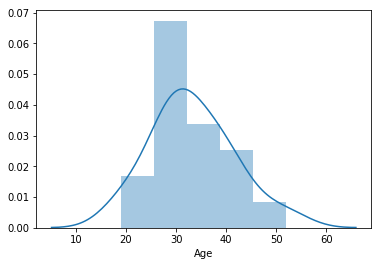

In [32]:
cancer_data = data.loc[data['Dx:Cancer'] == 1]

sns.distplot(cancer_data['Age'])

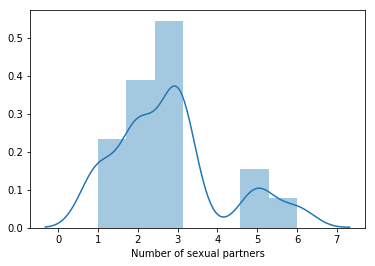

In [33]:
sns.distplot(cancer_data['Number of sexual partners'])


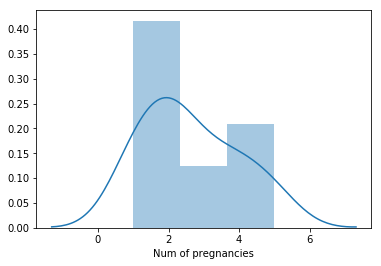

In [34]:
sns.distplot(cancer_data['Num of pregnancies'])

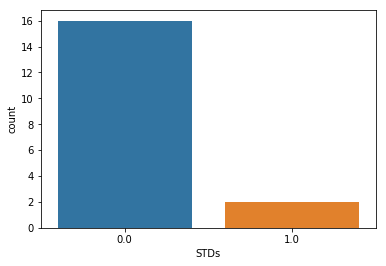

In [41]:
sns.countplot(cancer_data['STDs'])

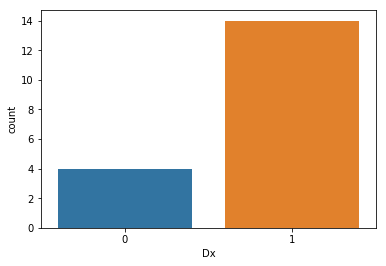

In [42]:
sns.countplot(cancer_data['Dx'])